In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring

In [3]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [4]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Price and EngineV has some missing values

In [6]:
len(raw_data.Model.unique())

312

Creating 312 dummy variables is not feasible, so we will drop Model column.

In [7]:
data = raw_data.drop('Model' , axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


**Removing rows containing missing values**

In [8]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Exploring Probability Density Functions (PDF's) of continuous variables

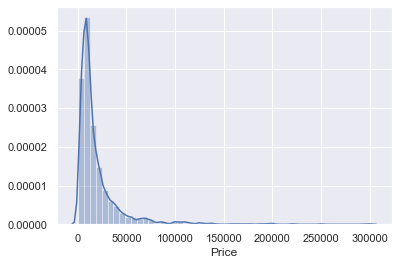

In [9]:
sns.distplot(data_no_mv['Price'])

#### Deaiing with outliers

In [10]:
q = data_no_mv['Price'].quantile(0.99)
q

129812.51999999981

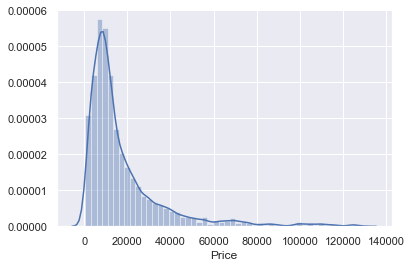

In [11]:
data_1 = data_no_mv[data_no_mv['Price']<129812]
sns.distplot(data_1['Price'])

Data is still distributed the same way but now is with less outlierts.

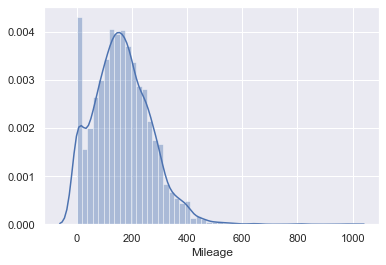

In [12]:
sns.distplot(data_1['Mileage'])

In [13]:
q = data_1['Mileage'].quantile(0.99)
q

435.5100000000002

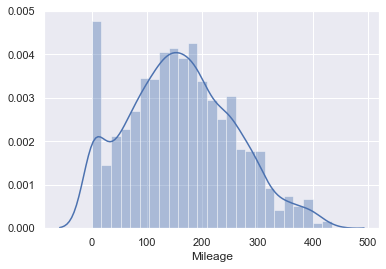

In [14]:
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

In [15]:
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


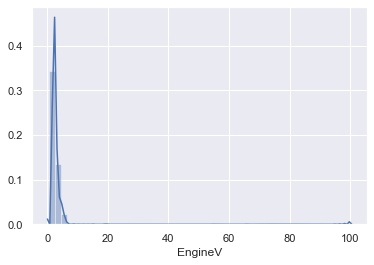

In [16]:
sns.distplot(data_2['EngineV'])

In [17]:
data_2['EngineV'].value_counts()

2.00     681
3.00     484
2.50     335
1.60     308
2.20     271
        ... 
2.10       1
2.57       1
0.60       1
75.00      1
0.65       1
Name: EngineV, Length: 70, dtype: int64

In [18]:
len(data_2['EngineV'].unique())

70

We know that engine values cant be greater than 6 , so we will discard the observations having engine values greater than 6.

In [19]:
data_3 = data_2[data_2['EngineV']<6]
data_3.describe()

,Price,Mileage,EngineV,Year
count,3894.000000,3894.000000,3894.000000,3894.000000
mean,17823.805845,161.598100,2.417681,2006.397021
std,18919.010466,96.176488,0.896970,6.611338
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2012.000000
max,129222.000000,435.000000,5.700000,2016.000000


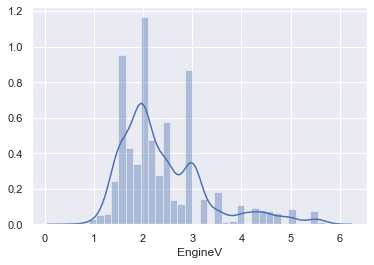

In [20]:
sns.distplot(data_3['EngineV'])

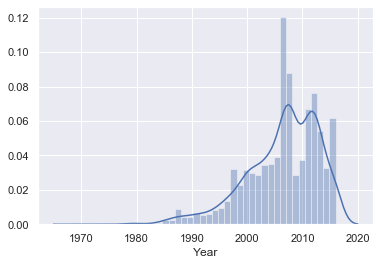

In [21]:
sns.distplot(data_3['Year'])

In [22]:
q = data_3['Year'].quantile(0.01)
q

1987.0

In [23]:
data_4 = data_3[data_3['Year']>q]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3840.000000,3840.000000,3840.000000,3840.000000
mean,18028.973987,160.860156,2.424310,2006.702865
std,18963.887320,95.742943,0.899824,6.117627
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,92.000000,1.800000,2003.000000
50%,11525.000000,157.500000,2.200000,2008.000000
75%,21500.000000,226.000000,3.000000,2012.000000
max,129222.000000,435.000000,5.700000,2016.000000


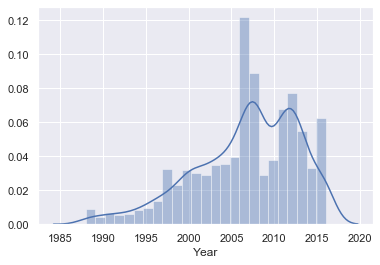

In [24]:
sns.distplot(data_4['Year'])

In [25]:
data_4.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'],
      dtype='object')

Lets now check how manty observations we have deleted

In [26]:
((len(raw_data) - len(data_4))/ len(raw_data))*100

11.622554660529344

So we have deleted 11% of the data. And it is less than 30%. 

### Lets now check OLS assumptions

**Checking linearity using scatter plot**

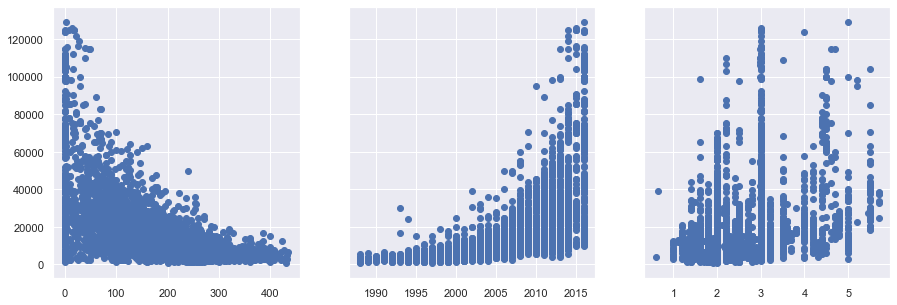

In [27]:
fig ,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5), sharey = True)
ax1.scatter(data_4['Mileage'],data_4['Price'])
ax2.scatter(data_4['Year'],data_4['Price'])
ax3.scatter(data_4['EngineV'],data_4['Price'])
plt.show()

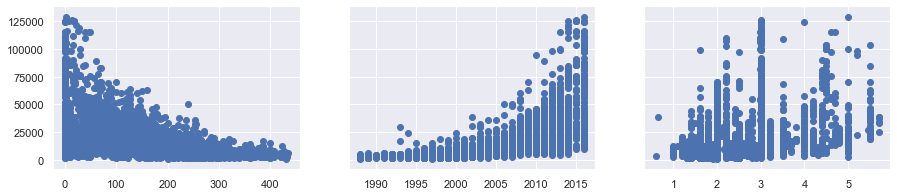

In [28]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(data_4['Mileage'],data_4['Price'])
ax2.scatter(data_4['Year'],data_4['Price'])
ax3.scatter(data_4['EngineV'],data_4['Price'])


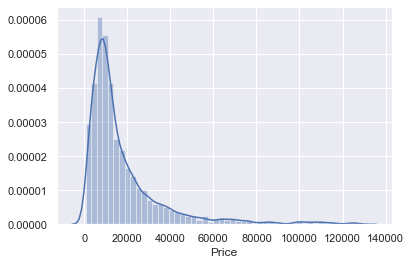

In [29]:
sns.distplot(data_4['Price'])

**The relationship is exponential, so we will apply log transformation on price**

In [30]:
log_price = np.log(data_4['Price'])
log_price

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
4338     9.350102
4339     9.792556
4340    11.736069
4341     8.779557
4344     9.510445
Name: Price, Length: 3840, dtype: float64

C:\Users\kanha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


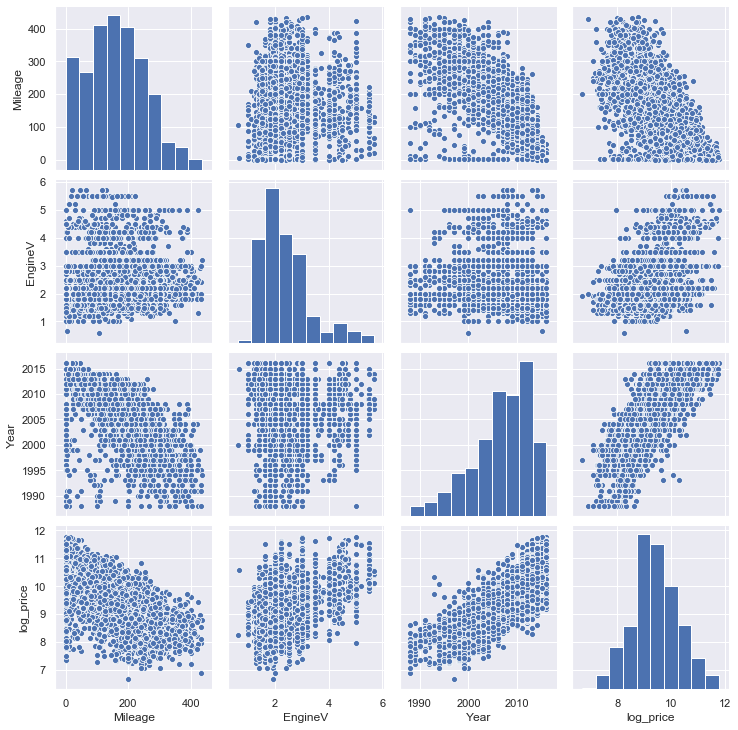

In [31]:
data_4['log_price'] = log_price
sns.pairplot(data_4[['Mileage','EngineV','Year','log_price']])

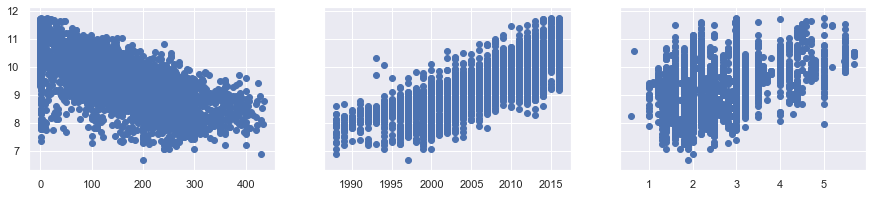

In [32]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(data_4['Mileage'],data_4['log_price'])
ax2.scatter(data_4['Year'],data_4['log_price'])
ax3.scatter(data_4['EngineV'],data_4['log_price'])


**Now we observe a linear relationship of other variables with log_price due to log transformation.**

In [33]:
data_cleaned = data_4.drop('Price' , axis = 1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [34]:
data_cleaned.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3840,3840,3840.000000,3840.000000,3840,3840,3840.000000,3840.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1451,NaN,NaN,1806,3478,NaN,NaN
mean,NaN,NaN,160.860156,2.424310,NaN,NaN,2006.702865,9.408321
std,NaN,NaN,95.742943,0.899824,NaN,NaN,6.117627,0.873615
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,92.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.500000,2.200000,NaN,NaN,2008.000000,9.352272
75%,NaN,NaN,226.000000,3.000000,NaN,NaN,2012.000000,9.975808


### Multicollinearity

In [35]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [36]:
data_cleaned.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values , i) for i in  range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.798257,Mileage
1,10.823028,Year
2,8.262153,EngineV


In [38]:
data_no_multicollinearity = data_cleaned.drop('Year' , axis = 1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
4338,Volkswagen,van,163,2.5,Diesel,yes,9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
4341,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [39]:
data_no_multicollinearity['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### <u>Creating Dummy Variables<u>

### Note:
**If we have N categories, we have to create N-1 dummies**

In [40]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity , drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [41]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [42]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [43]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

In [44]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price' , axis = 1)

#### Scale the data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
inputs_scaled = scaler.transform(inputs)

**Train and Test Split**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled , targets , test_size = 0.2 , random_state = 365)

**Create the regression**

In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
yhat = reg.predict(x_train)

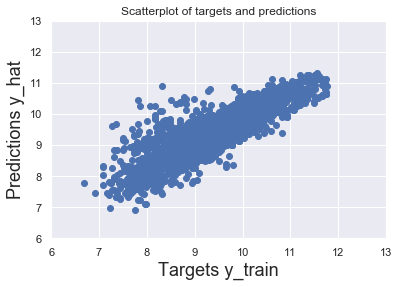

In [51]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets y_train',size = 18)
plt.ylabel('Predictions y_hat', size = 18)
plt.title('Scatterplot of targets and predictions')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

**In the above viz, the actual targets and predicted targets are not scattered, which means our model is performing well.**

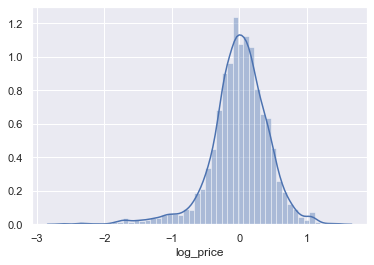

In [52]:
sns.distplot(y_train-yhat)

**In the above viz we can see that the error term is normally distributed, which follows the assumption of OLS**

In [53]:
reg.score(x_train,y_train)

0.7530909994619517

In [54]:
reg.intercept_

9.40624015974228

In [55]:
len(reg.coef_)

17

In [56]:
reg.coef_

array([-0.46208995,  0.20783939,  0.02796076,  0.02181996, -0.13396688,
       -0.17590569, -0.05228283, -0.0833789 , -0.15189951, -0.10228949,
       -0.18570147, -0.12102094, -0.15973313, -0.12825029, -0.03177898,
       -0.15309642,  0.31756163])

In [57]:
temp_df = pd.DataFrame(inputs.columns,columns = ['Features'])
temp_df['Weights'] = reg.coef_
temp_df

,Features,Weights
0,Mileage,-0.462090
1,EngineV,0.207839
2,Brand_BMW,0.027961
3,Brand_Mercedes-Benz,0.021820
4,Brand_Mitsubishi,-0.133967
5,Brand_Renault,-0.175906
6,Brand_Toyota,-0.052283
7,Brand_Volkswagen,-0.083379
8,Body_hatch,-0.151900
9,Body_other,-0.102289


**Dummies are not compared to the categorical variables, they are compared to their respective benchmark that we have dropped earlier(while dummy creation)**

In [58]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

**It is noticed that AUDI has been dropped, so if a brand is having a positive value it means it priced more than AUDI and if it is negative , it is less costly than AUDI.**

## Testing

In [59]:
y_hat_test = reg.predict(x_test)

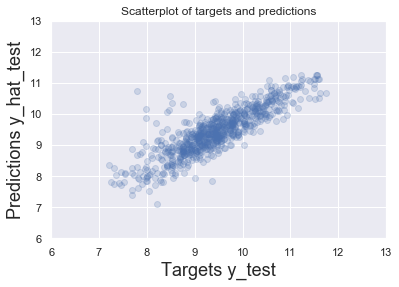

In [60]:
plt.scatter(y_test,y_hat_test,alpha = 0.2)
plt.xlabel('Targets y_test',size = 18)
plt.ylabel('Predictions y_hat_test', size = 18)
plt.title('Scatterplot of targets and predictions')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

**Although some points are scattered at the lower tail, the concentration is at the center i.e, newar to the 45 degree line. SO we can accept this model.**

In [61]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns = ['Prediction'])
df_pf.head()

,Prediction
0,15535.946008
1,2796.672171
2,11365.210116
3,18659.097878
4,11913.497999


In [62]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,15535.946008,NaN
1,2796.672171,7900.0
2,11365.210116,NaN
3,18659.097878,NaN
4,11913.497999,NaN
...,...,...
763,7542.214217,16800.0
764,16819.771391,8999.0
765,3249.970728,NaN
766,3211.646544,NaN


In [63]:
y_test

170     9.082507
915     8.556414
2210    9.803667
79      9.661416
2021    9.169518
          ...   
405     8.507143
14      9.680344
2343    8.594154
2029    8.318742
1962    9.350102
Name: log_price, Length: 768, dtype: float64

In [64]:
y_test = y_test.reset_index(drop = True)

In [65]:
y_test

0      9.082507
1      8.556414
2      9.803667
3      9.661416
4      9.169518
         ...   
763    8.507143
764    9.680344
765    8.594154
766    8.318742
767    9.350102
Name: log_price, Length: 768, dtype: float64

In [66]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,15535.946008,8800.0
1,2796.672171,5200.0
2,11365.210116,18100.0
3,18659.097878,15700.0
4,11913.497999,9600.0
...,...,...
763,7542.214217,4950.0
764,16819.771391,16000.0
765,3249.970728,5400.0
766,3211.646544,4100.0


In [67]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [68]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,15535.946008,8800.0,-6735.946008,76.544841
1,2796.672171,5200.0,2403.327829,46.217843
2,11365.210116,18100.0,6734.789884,37.208784
3,18659.097878,15700.0,-2959.097878,18.847757
4,11913.497999,9600.0,-2313.497999,24.098937
...,...,...,...,...
763,7542.214217,4950.0,-2592.214217,52.367964
764,16819.771391,16000.0,-819.771391,5.123571
765,3249.970728,5400.0,2150.029272,39.815357
766,3211.646544,4100.0,888.353456,21.667157


In [69]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,768.000000,768.000000,768.000000,768.000000
mean,16447.874138,18297.171302,1849.297164,38.473729
std,13384.954198,18743.891850,10038.263969,87.490563
min,1216.582743,1350.000000,-42815.485475,0.153037
25%,7653.198480,7300.000000,-2060.821266,11.685370
50%,12075.240486,12350.000000,424.778099,23.458972
75%,20581.882742,20814.787500,3597.752988,41.438934
max,77042.055420,126000.000000,83122.691419,1783.978561


In [70]:
df_pf.sort_values(by = ['Difference%'])

,Prediction,Target,Residual,Difference%
650,3004.591103,3000.0,-4.591103,0.153037
607,39566.023996,39500.0,-66.023996,0.167149
437,29555.489167,29500.0,-55.489167,0.188099
346,45123.591307,44999.0,-124.591307,0.276876
198,11548.102458,11500.0,-48.102458,0.418282
...,...,...,...,...
600,31664.685921,4999.0,-26665.685921,533.420403
536,19353.964035,2900.0,-16453.964035,567.378070
286,39557.173331,4800.0,-34757.173331,724.107778
758,25602.072506,2900.0,-22702.072506,782.830086
